## Logistic regression 
🔸 Logistic regression is an algorithm that can help us answering yes or no questions by predicting the probability something happening or not happening.

🔸 Logistic regression is a classification algorithm despite its name has regression in it. It predicts two binary dependent output either as 0 or 1 based on the input variables.

🔸The regression in its name means we are using the same algorithm as used in linear
regression. The difference is that the output is mapped using a logistic/sigmoid
function so that it will be in a range between 0 and 1. Any output value < 0.5 will be
classified as 0 and any value >= 0.5 will be classified as 1.

🔸 In this notebook, the logistic regression algorithm is coded step by step following:

<img src="LogisticRegression_coding_steps.PNG"/> 

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Coding the algorithm

In [2]:
class LogisticRegression():
    def __init__(self, x, y):
        x0 = np.ones((x.shape[0],1)) # add the bias term
        x = np.append(x0, x, axis=1) # append the bias to the input variable
        self.x = x
        self.y = y
        self.m = x.shape[0]
        self.n = x.shape[1]
        self.theta = np.random.randn(self.n) # initialize the weights with random numbers
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def CostFunction(self):
        self.h = self.sigmoid(np.matmul(self.x, self.theta)) # calculate the hypothesis h 
        self.J = (-1/self.m) * np.sum( self.y*np.log(self.h) + (1-self.y)*np.log(1 - self.h) )
#         print (self.J)
        return self.h, self.J
    
    def GradientDescent(self, epoch=10, alpha=0.01):
        self.cost_history = []
        self.theta_history = []
        for i in range(epoch):
            h, J = self.CostFunction()
            self.cost_history.append(J)
            self.theta_history.append(self.theta)
            self.theta = self.theta - alpha / self.m * np.dot(self.x.T, h-self.y)
        pass
    
    def Theta(self):
        return self.theta
    
    def CostHistory(self):
        return self.cost_history
    
    def ThetaHistory(self):
        return self.theta_history
    
    def predict(self, x_test, y_test):
        x0 = np.ones((x_test.shape[0],1))
        x_test = np.append(x0, x_test, axis=1)
        self.y_pred = self.sigmoid(np.matmul(x_test, self.theta))
        self.y_pred[self.y_pred>=0.5] = 1
        self.y_pred[self.y_pred<0.5] = 0     
        self.test_accuracy = (self.y_pred == y_test).sum()/ len(y_test)*100
        return self.y_pred.astype(int), self.test_accuracy
            

In [3]:
# feature scaling is not used in this notebook, coded for fun. 
class FeatureScaler():
    def __init__(self, x):
        self.x = x.copy().astype(float)
    def FitTransform(self):
        n = self.x.shape[1]
        for i in range(n):
            xi = self.x[:,i]
            xi_scaled = (xi - xi.mean()) / (xi.max() - xi.min())
            self.x[:,i] = xi_scaled
        return self.x

### Simulating data

The data used in this notebook are simulated using np.random.multivariate_normal to create two seperable features.
Credit to [git repo](https://github.com/vu2swz/Logistic-Regression-from-Scratch-in-Python/blob/master/data.py)

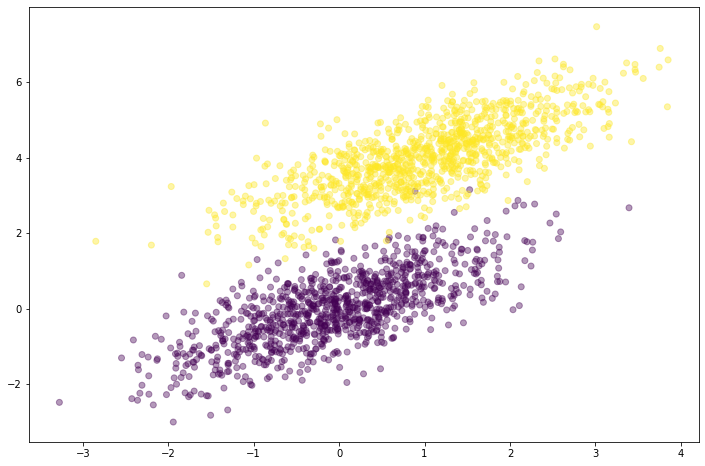

In [4]:
np.random.seed(42)
num_observations = 1000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)
features = np.vstack((x1, x2)).astype(np.float32)
labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

#Displaying the output

plt.figure(figsize=(12,8))
plt.scatter(features[:, 0], features[:, 1], c = labels, alpha = .4)
plt.show()

### Split data to train and test dataset

In [5]:
df = pd.DataFrame()

In [6]:
df['feature_1'] = features[:,0]
df['feature_2'] = features[:,1]
df['label'] = labels.astype(int)

In [7]:
df.head()

,feature_1,feature_2,label
0,-0.415750,-0.513517,0
1,-1.144330,-0.067385,0
2,0.301810,0.136251,0
3,-1.748547,-1.205889,0
4,0.247329,0.630977,0


In [8]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [9]:
train_frac = 0.7
train_size = int(df.shape[0] * train_frac)
x = np.array(df.iloc[:,0:2])
y = np.array(df.iloc[:,2])
x_train = x[0:train_size,:]
y_train = y[0:train_size]
x_test = x[train_size:,:]
y_test = y[train_size:]

In [10]:
print ('training size is {}\ntest size is {}'.format(x_train.shape[0], x_test.shape[0]))

training size is 1400
test size is 600


### Initialize the model

In [11]:
clf = LogisticRegression(x_train, y_train)

### Predict using gradient descent method

In [12]:
epoch = 1000
alpha = 0.5
clf.GradientDescent(epoch, alpha)
y_pred_train, train_error = clf.predict(x_train,y_train)
y_pred_test, accuracy = clf.predict(x_test,y_test)
theta = clf.Theta()

In [13]:
# print the test data, predicted test data and the error
print('y_test\n {}\n\ny_pred_test\n {}\n\ntest accuracy (%) {}\n\ntheta {}'
      .format(y_test[0:20], y_pred_test[0:20], accuracy, theta))

y_test
 [0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1]

y_pred_test
 [0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1]

test accuracy (%) 99.5

theta [-6.51769471 -1.92665152  3.77311985]


### Visulize cost vs epochs

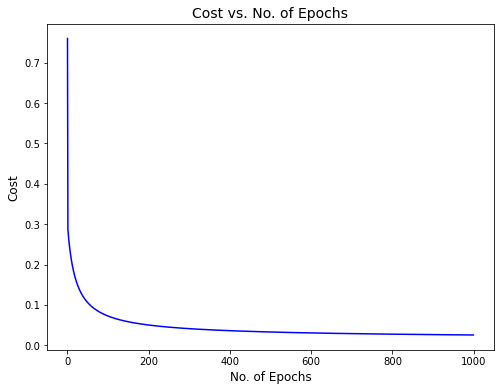

In [14]:
cost = clf.CostHistory()
fig = plt.figure(figsize=(8,6))
plt.plot(range(epoch), cost, c='b')
plt.title('Cost vs. No. of Epochs', fontsize=14)
plt.xlabel('No. of Epochs', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.show()

### Visulize fitted results using both method

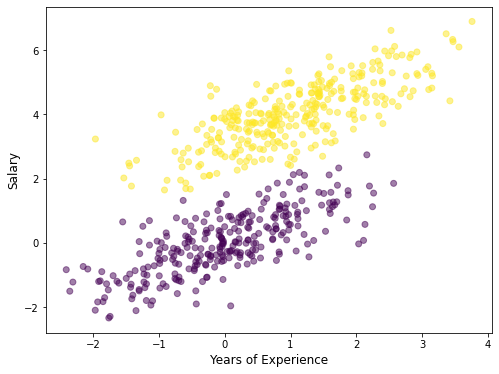

In [15]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test[:,0], x_test[:,1], c=y_pred_test, alpha = .5)
plt.title('', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()

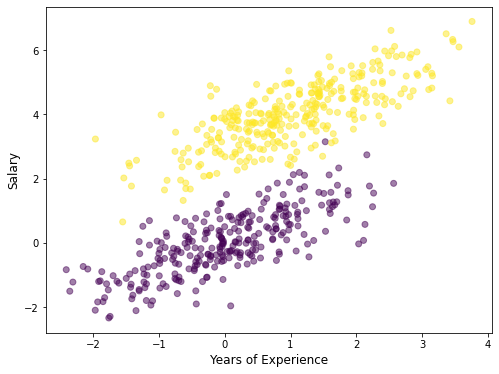

In [16]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, alpha = .5)
plt.title('', fontsize=14)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.show()